### About U.S. Cancer Statistics
#### U.S. Cancer Statistics (USCS): The Official Federal Cancer Statistics.The United States Cancer Statistics are the official government statistics on cancer. These statistics include cancer registry data from CDC’s National Program of Cancer Registries (NPCR) and the National Cancer Institute’s (NCI) Surveillance, Epidemiology, and End Results (SEER) Program,external icon as well as mortality data from CDC’s National Center for Health Statistics. The statistics provide information on newly diagnosed cancer cases and cancer deaths for the whole U.S. population.

This national coverage enables the public, including researchers, clinicians, policy makers, and public health professionals, to—

- Monitor populations most affected by cancer.
- Evaluate the success of programs designed to prevent cancer and diagnose cancer at early stages.
- Identify additional needs for cancer prevention and control efforts at national, state, and local levels.
- Evaluate cancer prevention and screening programs and the quality of cancer care.
- Document racial and sex disparities.
- Demonstrate the effectiveness of public health interventions.
- Guide the translation of research into health policy and practice.

UV data: 3108
Cancer data: 3152


USGS says:

There are 3,141 counties and county equivalents in the 50 States and the District of Columbia:

3,007 entities named "County"
16 Boroughs in Alaska
11 Census Areas in Alaska (for areas not organized into Boroughs by the State)
64 Parishes in Louisiana
42 Independent Cities (1 in Maryland, 1 in Missouri, 1 in Nevada, and the remainder in Virginia)
1 District - the Federal District or District of Columbia
This does not include Commonwealths and territories and their 121 county equivalents:

Puerto Rico - 78 Municipios
U.S. Virgin Islands - 2 Districts
Guam - 19 Election Districts
Northern Mariana Islands - 17 Districts
American Samoa - 5 Districts

In [370]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

#Cancer Types Grouped by County (ByArea_County)
BYAREA_COUNTY = pd.read_csv('BYAREA_COUNTY.TXT', delimiter = '|')

# #Cancer Types Grouped by Race and Ethnicity (BySite)
# BYSITE = pd.read_csv('BYSITE.TXT', delimiter = '|')

# #Childhood Cancer Detailed by Primary Cancer Site Groups and Age (0-14, 0-19) (ChildByAge_Adj)
# CHILDBYAGE_ADJ = pd.read_csv('CHILDBYAGE_ADJ.TXT', delimiter = '|')

# #Childhood Cancer Detailed by Primary Cancer Site Groups and Age (<1, 1-4, 5-9, 10-14, 15-19) (ChildByAge_cr)
# CHILDBYAGE_CR  = pd.read_csv('CHILDBYAGE_CR.TXT', delimiter = '|')

# #Childhood Cancer Detailed by Primary Cancer Site Groups (ChildBySite)
# CHILDBYSITE  = pd.read_csv('CHILDBYSITE.TXT', delimiter  = '|')

# #Childhood Cancer Detailed by ICCC Group and Age (0-14, 0-19) (ICCCByAge_adj)
# ICCCBYAGE_ADJ = pd.read_csv('ICCCBYAGE_ADJ.TXT', delimiter  = '|')

# #Childhood Cancer Detailed by ICCC Group and Age (<1, 1-4, 5-9, 10-14, 15-19) (ICCCByAge_cr)
# ICCCBYAGE_CR = pd.read_csv('ICCCBYAGE_CR.TXT', delimiter = '|')

# #Childhood Cancer Detailed by ICCC group (ICCCBySite)
# ICCCBYSITE = pd.read_csv('ICCCBYSITE.TXT', delimiter = '|')

#EXCEL file associated with this data
# Data_Dict =  pd.read_excel('Data Dictionary USCS ASCII 1999-2016.xlsx')


# ICCCBYAGE = pd.read_csv('ICCCBYAGE_ADJ.TXT', delimiter = '|')

# #Brain Cancers by Tumor Type (BrainBySite)
# BRAINBYSITE = pd.read_csv('BRAINBYSITE.TXT', delimiter = '|')

# #Cancer Types Grouped by Age, Race, and Ethnicity (ByAge)
# BYAGE = pd.read_csv('BYAGE.TXT', delimiter = '|')

# #Cancer Types Grouped by State and Region (ByArea)
# BYAREA = pd.read_csv('BYAREA.TXT', delimiter = '|')

In [373]:
a = BYAREA_COUNTY
b = a[a.SITE == 'Melanomas of the Skin']
b = a[a.COUNT != "~"]
c = b[b.COUNT != "."]
d = c[c.SITE == 'Melanomas of the Skin']
e = d[d.COUNT != "+"]
# e['%CANCER'] = e['COUNT']/e['POPULATION']*100 hamid said this to up the values
incidence  = e[e.EVENT_TYPE  == 'Incidence']

all_gender = incidence[incidence.SEX ==  "Male and Female"]
males = incidence[incidence.SEX ==  "Male"]
male = males[males.RACE == "All Races"]

females = incidence[incidence.SEX ==  "Female"]
female = females[females.RACE == "All Races"]

totals = all_gender[all_gender.RACE == "All Races"]

White = all_gender[all_gender.RACE == "White"]
Hispanic = all_gender[all_gender.RACE == 'Hispanic']
Black = all_gender[all_gender.RACE == 'Black']
Asian = all_gender[all_gender.RACE == 'Asian/Pacific Islander']
AmericanIndian  = all_gender[all_gender.RACE == 'American Indian/Alaska Native']

RACES: 'All Races', 'White', 'Hispanic', 'Black', 'Asian/Pacific Islander', 'American Indian/Alaska Native' 

### Incidence

In [374]:
# totals
# print(len(female))
# print(len(male))
# print(len(Hispanic))
# print(len(Black))
# print(len(White))
# print(len(Asian))
# print(len(AmericanIndian))
# print(len(totals))

In [375]:
import re

def fips_search(area):
    m = re.search('\((.+)\)', area)
    if m:
        return m.group(1)
    return "Not Found"


def county_search(area):
    n = re.search(':(.+)\(', area)
    if n:
        return n.group(1)
    return "Not Found"
# a["COUNTY_NAME"] = a['AREA'].apply(county_search)

In [377]:
totals["FIPS"] = totals['AREA'].apply(fips_search)
totals['COUNTY_FIPS'] = totals['FIPS'].astype(int)
totals["CANCER_COUNT"] = totals["COUNT"].astype(int)
totals.drop('FIPS', axis = 1, inplace = True)
totals.drop('COUNT', axis = 1, inplace = True)
totals["% Melanoma"] = totals["CANCER_COUNT"]/totals["POPULATION"]

#### Split on UV, Compare on melanoma
Divide counties to high UV counties and low UV counties and take the average melanoma rate or each and perform a hypothesis test.

Null HO: there is no difference between melanoma incidence in counties with high UV and low UV exposure rates

Alternate HA: there is a difference between melanoma incidence in counties with high UV and low UV exposure rates

##  Mann-Whitney
##  Two-Tailed T-Test (Welch's)

Reasons to use different sample sizes, or reason to believe that variance is very different or strong indication that there is no normality or skewed or kertotic data
sample sizes are more or less the same or very different AND sample variances 

In [232]:
UV = pd.read_csv('UV/uv-county.csv', delimiter = ',')
midpoint = UV["UV_ Wh/m_"].quantile(.5)

High_UV_Counties = UV[UV["UV_ Wh/m_"] >= midpoint]
Low_UV_Counties = UV[UV["UV_ Wh/m_"] < midpoint]

In [348]:
low_merged = totals.merge(Low_UV_Counties, left_on='COUNTY_FIPS', right_on='COUNTY_FIPS', how='inner')
# merged.drop(['FIPS','AGE_ADJUSTED_CI_UPPER', 'COUNT', 'AGE_ADJUSTED_CI_LOWER','AGE_ADJUSTED_RATE', 'CRUDE_CI_LOWER', 'CRUDE_CI_UPPER', 'CRUDE_RATE'], axis = 1, inplace = True)
low = np.array(low_merged['% Melanoma'])

high_merged = totals.merge(High_UV_Counties, left_on='COUNTY_FIPS', right_on='COUNTY_FIPS', how='inner')
high_merged.drop(['AGE_ADJUSTED_CI_UPPER', 'AGE_ADJUSTED_CI_LOWER','AGE_ADJUSTED_RATE', 'CRUDE_CI_LOWER', 'CRUDE_CI_UPPER', 'CRUDE_RATE'], axis = 1, inplace = True)
high = np.array(high_merged['% Melanoma'])


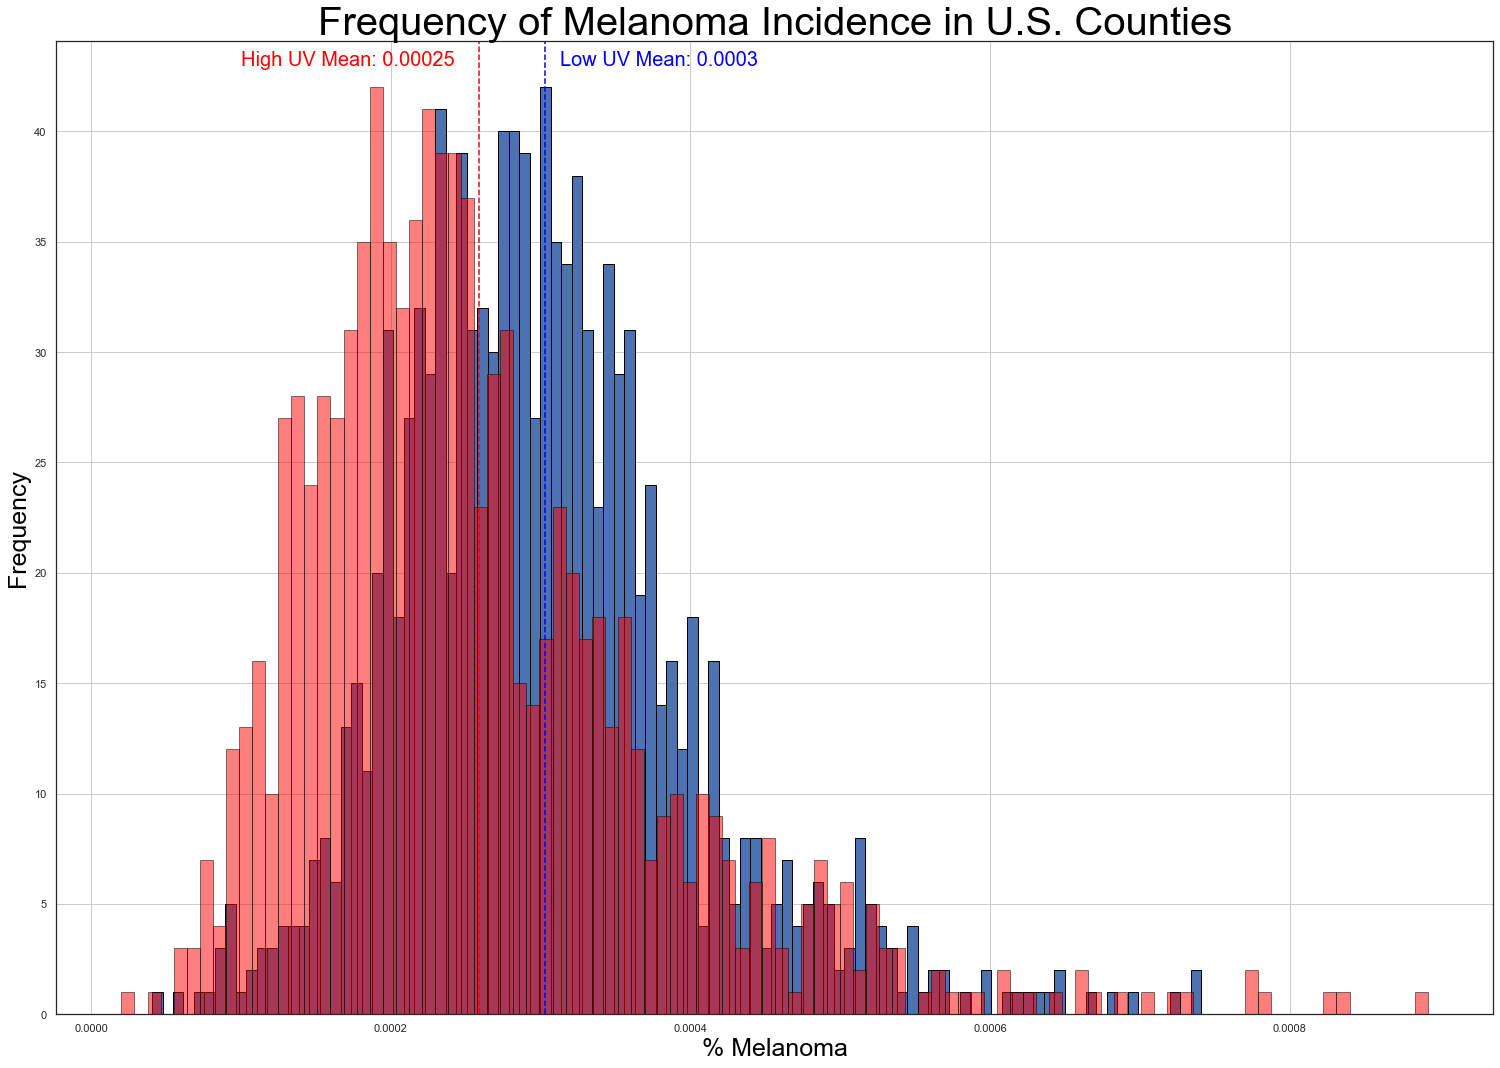

In [319]:
#high_merged['% Melanoma'].hist(bins = 100,)
#low_merged['% Melanoma'].hist(bins = 100, color = 'red', alpha = 0.5)

import plotly.graph_objects as go
import plotly.io as pio

fig, ax = plt.subplots(figsize=(21,15))
ax.hist(low, bins = 100, edgecolor='black')
ax.hist(high, bins = 100, color = 'red', alpha = 0.5, edgecolor='black')

ax.set_xlabel('% Melanoma', size=25, color='black')
ax.set_ylabel('Frequency', size=25, color='black')
ax.set_title('Frequency of Melanoma Incidence in U.S. Counties', size=40, color='black')
ax.axvline(high.mean(), color='red',  linestyle='--')
ax.axvline(low.mean(), color='blue',  linestyle='--')
ax.text(.0001, 43, 'High UV Mean: 0.00025', color='red', size=20,)
ax.text(low.mean() + .00001, 43, 'Low UV Mean: 0.0003' , color='blue', size=20)
ax.grid()
plt.tight_layout()

MannwhitneyuResult(statistic=375361.0, pvalue=2.0293872103422155e-33)
MannwhitneyuResult(statistic=703679.0, pvalue=4.058774420684431e-33)
low: 0.0003027473637287206
high: 0.00025865546193807785


[Text(0, 0, 'Low UV'), Text(0, 0, 'High UV')]

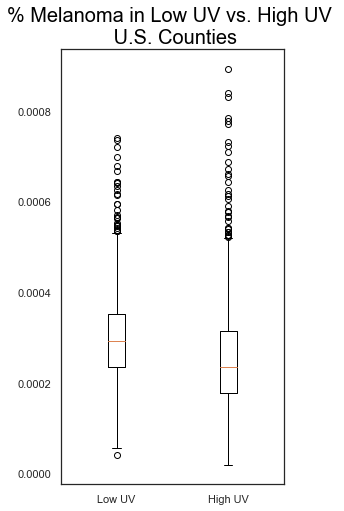

In [367]:
res = stats.mannwhitneyu(high, low, alternative = 'less')
print(res)
#MannwhitneyuResult(statistic=375361.0, pvalue=2.0293872103422155e-33)


res = stats.mannwhitneyu(low, high, alternative = 'two-sided')
print(res)
#MannwhitneyuResult(statistic=703679.0, pvalue=4.058774420684431e-33)

print("low:", low.mean()) # higher rate of melanoma in low UV
print("high:", high.mean()) # lower rate of melanoma in high UV
stats.ttest_ind(high, low, equal_var = False)
fig, ax = plt.subplots(1, figsize=(4, 8))
ax.boxplot([low, high])
ax.set_xticks([1,2])
ax.set_title('% Melanoma in Low UV vs. High UV \n U.S. Counties', size=20, color='black')
ax.set_xticklabels(["Low UV", "High UV"])

# .25 Quartile vs .75 Quartile

In [334]:
higher_q = UV["UV_ Wh/m_"].quantile(.75)
lower_q = UV["UV_ Wh/m_"].quantile(.25)

Higher_UV_Counties = UV[UV["UV_ Wh/m_"] >= higher_q]
Lower_UV_Counties = UV[UV["UV_ Wh/m_"] < lower_q]

print(len(Higher_UV_Counties))
print(len(Lower_UV_Counties))

lower_merged = totals.merge(Lower_UV_Counties, left_on='COUNTY_FIPS', right_on='COUNTY_FIPS', how='inner')
# merged.drop(['FIPS','AGE_ADJUSTED_CI_UPPER', 'COUNT', 'AGE_ADJUSTED_CI_LOWER','AGE_ADJUSTED_RATE', 'CRUDE_CI_LOWER', 'CRUDE_CI_UPPER', 'CRUDE_RATE'], axis = 1, inplace = True)
lower = np.array(lower_merged['% Melanoma'])

higher_merged = totals.merge(Higher_UV_Counties, left_on='COUNTY_FIPS', right_on='COUNTY_FIPS', how='inner')
# # merged.drop(['AGE_ADJUSTED_CI_UPPER', 'COUNT', 'AGE_ADJUSTED_CI_LOWER','AGE_ADJUSTED_RATE', 'CRUDE_CI_LOWER', 'CRUDE_CI_UPPER', 'CRUDE_RATE'], axis = 1, inplace = True)
higher = np.array(higher_merged['% Melanoma'])


# higher_merged['% Melanoma'].hist(bins = 100, color = 'red', alpha = 1)
# lower_merged['% Melanoma'].hist(bins = 100, color = 'blue', alpha = 0.4)

res = stats.mannwhitneyu(higher, lower, alternative = 'less')
print(res)

res = stats.mannwhitneyu(lower, higher, alternative = 'two-sided')
print(res)


print("lower:", lower.mean()) # higher rate of melanoma in low UV
print("higher:", higher.mean()) # lower rate of melanoma in high UV

print(stats.ttest_ind(higher, lower, equal_var = False))

778
777
MannwhitneyuResult(statistic=89716.0, pvalue=2.0747171482420078e-16)
MannwhitneyuResult(statistic=165704.0, pvalue=4.1494342964840156e-16)
lower: 0.0002960667245324005
higher: 0.0002556266262057972
Ttest_indResult(statistic=-5.4856931019461195, pvalue=5.6871830193203206e-08)


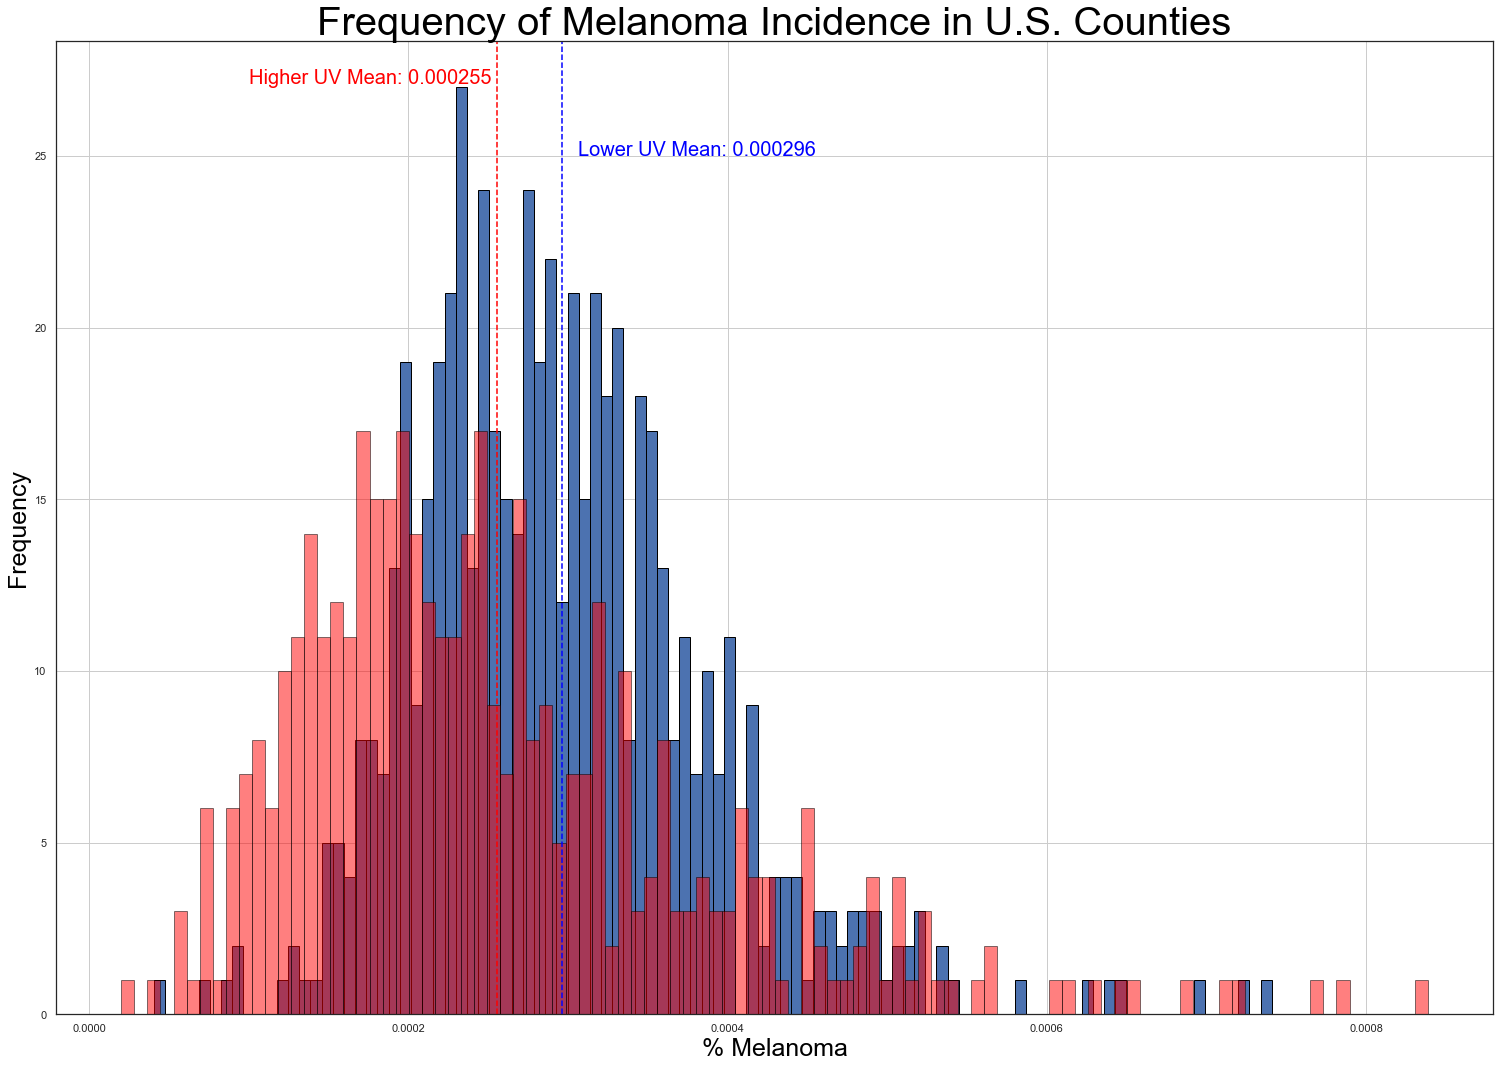

In [336]:
fig, ax = plt.subplots(figsize=(21,15))
ax.hist(lower, bins = 100, edgecolor='black')
ax.hist(higher, bins = 100, color = 'red', alpha = 0.5, edgecolor='black')

ax.set_xlabel('% Melanoma', size=25, color='black')
ax.set_ylabel('Frequency', size=25, color='black')
ax.set_title('Frequency of Melanoma Incidence in U.S. Counties', size=40, color='black')
ax.axvline(higher.mean(), color='red',  linestyle='--')
ax.axvline(lower.mean(), color='blue',  linestyle='--')
ax.text(.0001, 27.1, 'Higher UV Mean: 0.000255', color='red', size=20,)
ax.text(lower.mean() + .00001, 25, 'Lower UV Mean: 0.000296' , color='blue', size=20)
ax.grid()
plt.tight_layout()

# Bottom .1 Quantile vs Top .9 Quantile

312
311
MannwhitneyuResult(statistic=12134.0, pvalue=1.512765380427342e-07)
MannwhitneyuResult(statistic=23146.0, pvalue=3.025530760854684e-07)
lowest: 0.0003040835353521393
highest: 0.00026542501508620693
Ttest_indResult(statistic=-2.6626038826300467, pvalue=0.008408041926359714)


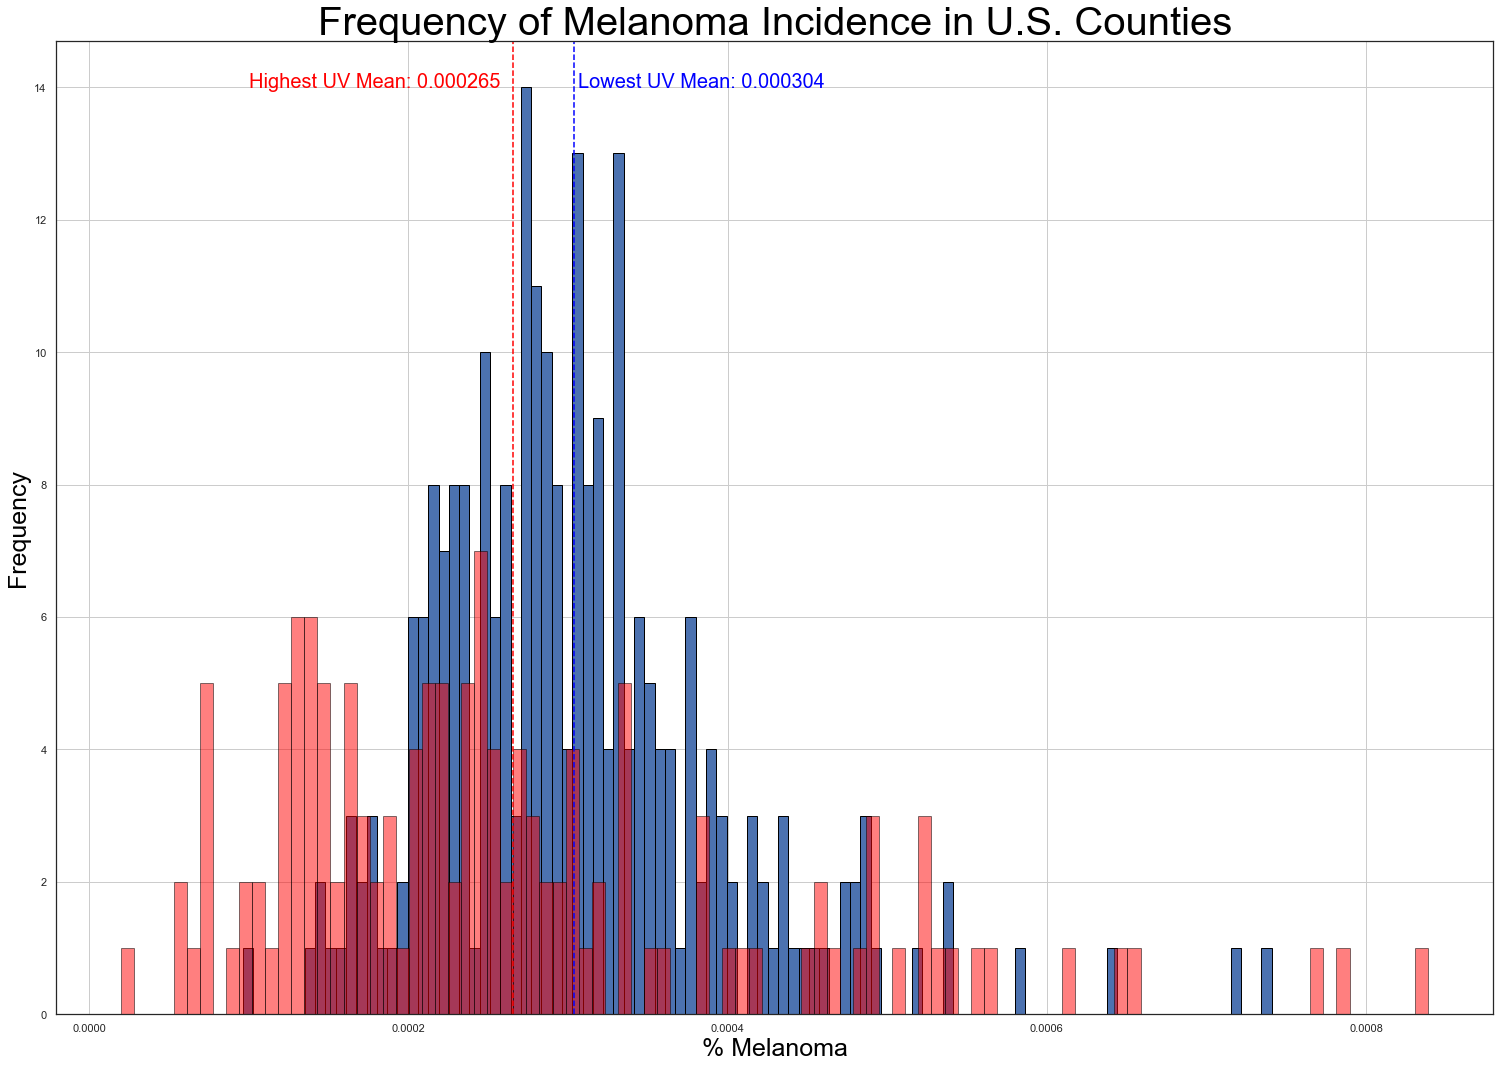

In [366]:
top_q = UV["UV_ Wh/m_"].quantile(.9)
bottom_q = UV["UV_ Wh/m_"].quantile(.1)

Highest_UV_Counties = UV[UV["UV_ Wh/m_"] >= top_q]
Lowest_UV_Counties = UV[UV["UV_ Wh/m_"] < bottom_q]

print(len(Highest_UV_Counties))
print(len(Lowest_UV_Counties))

lowest_merged = totals.merge(Lowest_UV_Counties, left_on='COUNTY_FIPS', right_on='COUNTY_FIPS', how='inner')
# merged.drop(['FIPS','AGE_ADJUSTED_CI_UPPER', 'COUNT', 'AGE_ADJUSTED_CI_LOWER','AGE_ADJUSTED_RATE', 'CRUDE_CI_LOWER', 'CRUDE_CI_UPPER', 'CRUDE_RATE'], axis = 1, inplace = True)
lowest = np.array(lowest_merged['% Melanoma'])

highest_merged = totals.merge(Highest_UV_Counties, left_on='COUNTY_FIPS', right_on='COUNTY_FIPS', how='inner')
# # merged.drop(['AGE_ADJUSTED_CI_UPPER', 'COUNT', 'AGE_ADJUSTED_CI_LOWER','AGE_ADJUSTED_RATE', 'CRUDE_CI_LOWER', 'CRUDE_CI_UPPER', 'CRUDE_RATE'], axis = 1, inplace = True)
highest = np.array(highest_merged['% Melanoma'])

# highest_merged['% Melanoma'].hist(bins = 100, color = 'red', alpha = 1)
# lowest_merged['% Melanoma'].hist(bins = 100, color = 'blue', alpha = 0.4)

res = stats.mannwhitneyu(highest, lowest, alternative = 'less')
print(res)

res = stats.mannwhitneyu(lowest, highest, alternative = 'two-sided')
print(res)


print("lowest:", lowest.mean()) # higher rate of melanoma in low UV
print("highest:", highest.mean()) # lower rate of melanoma in high UV

print(stats.ttest_ind(highest, lowest, equal_var = False))
fig, ax = plt.subplots(figsize=(21,15))
ax.hist(lowest, bins = 100, edgecolor='black')
ax.hist(highest, bins = 100, color = 'red', alpha = 0.5, edgecolor='black')

ax.set_xlabel('% Melanoma', size=25, color='black')
ax.set_ylabel('Frequency', size=25, color='black')
ax.set_title('Frequency of Melanoma Incidence in U.S. Counties', size=40, color='black')
ax.axvline(highest.mean(), color='red',  linestyle='--')
ax.axvline(lowest.mean(), color='blue',  linestyle='--')
ax.text(.0001, 14, 'Highest UV Mean: 0.000265', color='red', size=20,)
ax.text(lower.mean() + .00001, 14, 'Lowest UV Mean: 0.000304' , color='blue', size=20)
ax.grid()
plt.tight_layout()

# Extremes: .01 Quantile vs .99 Quantile

32
32
MannwhitneyuResult(statistic=61.0, pvalue=1.1021648404425783e-06)
MannwhitneyuResult(statistic=533.0, pvalue=2.2043296808851565e-06)
extremely low: 0.00035290962222522777
extremely high: 0.00019020258105994093
Ttest_indResult(statistic=-5.739935457930546, pvalue=8.202504759265414e-07)


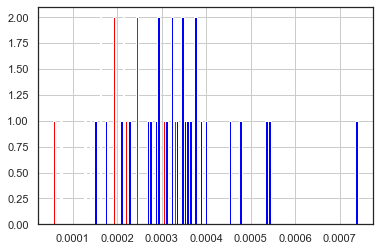

In [342]:
extreme_h = UV["UV_ Wh/m_"].quantile(.99)
extreme_l = UV["UV_ Wh/m_"].quantile(.01)

extreme_h_UV_Counties = UV[UV["UV_ Wh/m_"] >= extreme_h]
extreme_l_UV_Counties = UV[UV["UV_ Wh/m_"] < extreme_l]

print(len(extreme_h_UV_Counties))
print(len(extreme_l_UV_Counties))

extreme_l_merged = totals.merge(extreme_l_UV_Counties, left_on='COUNTY_FIPS', right_on='COUNTY_FIPS', how='inner')
# merged.drop(['FIPS','AGE_ADJUSTED_CI_UPPER', 'COUNT', 'AGE_ADJUSTED_CI_LOWER','AGE_ADJUSTED_RATE', 'CRUDE_CI_LOWER', 'CRUDE_CI_UPPER', 'CRUDE_RATE'], axis = 1, inplace = True)
extreme_l = np.array(extreme_l_merged['% Melanoma'])

extreme_h_merged = totals.merge(extreme_h_UV_Counties, left_on='COUNTY_FIPS', right_on='COUNTY_FIPS', how='inner')
# # merged.drop(['AGE_ADJUSTED_CI_UPPER', 'COUNT', 'AGE_ADJUSTED_CI_LOWER','AGE_ADJUSTED_RATE', 'CRUDE_CI_LOWER', 'CRUDE_CI_UPPER', 'CRUDE_RATE'], axis = 1, inplace = True)
extreme_h = np.array(extreme_h_merged['% Melanoma'])

# extreme_h_merged['% Melanoma'].hist(bins = 100, color = 'red', alpha = 1)
# extreme_l_merged['% Melanoma'].hist(bins = 100, color = 'blue', alpha = 1)
res = stats.mannwhitneyu(extreme_h, extreme_l, alternative = 'less')
print(res)

res = stats.mannwhitneyu(extreme_l, extreme_h, alternative = 'two-sided')
print(res)


print("extremely low:", extreme_l.mean()) # higher rate of melanoma in low UV
print("extremely high:", extreme_h.mean()) # lower rate of melanoma in high UV

print(stats.ttest_ind(extreme_h, extreme_l, equal_var = False))

In [60]:
merged = totals.merge(UV, left_on='COUNTY_FIPS', right_on='COUNTY_FIPS', how='left')
# merged.drop(['FIPS','AGE_ADJUSTED_CI_UPPER', 'COUNT', 'AGE_ADJUSTED_CI_LOWER','AGE_ADJUSTED_RATE', 'CRUDE_CI_LOWER', 'CRUDE_CI_UPPER', 'CRUDE_RATE'], axis = 1, inplace = True)
#merged["% Melanoma"].mean()
# merged.drop(index = [56, 106,213, 853, 941, 1174, 1603, 1804],axis = 1, inplace = True)
# merged_d = merged[merged['% Melanoma'] >0.008]
#merged.max()

,STATE,AREA,AGE_ADJUSTED_CI_LOWER,AGE_ADJUSTED_CI_UPPER,AGE_ADJUSTED_RATE,EVENT_TYPE,POPULATION,RACE,SEX,SITE,...,CRUDE_CI_LOWER,CRUDE_CI_UPPER,CRUDE_RATE,COUNTY_FIPS,CANCER_COUNT,% Melanoma,STATENAME,STATE_ABR,COUNTY NAME,UV_ Wh/m_
0,AK,AK: Anchorage Municipality (02020) - 1990+,14.3,19.0,16.5,Incidence,1495291.0,All Races,Male and Female,Melanomas of the Skin,...,12.6,16.6,14.5,2020,217,0.000145,NaN,NaN,NaN,NaN
1,AK,AK: Fairbanks North Star Borough (02090) - 1990+,10.5,18.4,14.1,Incidence,500805.0,All Races,Male and Female,Melanomas of the Skin,...,9.8,16.3,12.8,2090,64,0.000128,NaN,NaN,NaN,NaN
2,AK,AK: Juneau City and Borough (02110) - 1990+,12.7,26.9,18.8,Incidence,162472.0,All Races,Male and Female,Melanomas of the Skin,...,14.5,29.2,20.9,2110,34,0.000209,NaN,NaN,NaN,NaN
3,AK,AK: Kenai Peninsula Borough (02122) - 1990+,7.1,15.4,10.6,Incidence,288098.0,All Races,Male and Female,Melanomas of the Skin,...,7.6,15.7,11.1,2122,32,0.000111,NaN,NaN,NaN,NaN
4,AK,AK: Matanuska-Susitna Borough (02170) - 1990+,14.6,23.4,18.6,Incidence,492825.0,All Races,Male and Female,Melanomas of the Skin,...,13.2,20.7,16.6,2170,82,0.000166,NaN,NaN,NaN,NaN
5,AL,AL: Autauga County (01001),23.1,35.8,28.9,Incidence,274602.0,All Races,Male and Female,Melanomas of the Skin,...,25.7,39.5,32.0,1001,88,0.000320,Alabama,AL,Autauga,4563.0
6,AL,AL: Baldwin County (01003),28.4,34.9,31.5,Incidence,994220.0,All Races,Male and Female,Melanomas of the Skin,...,36.7,44.7,40.5,1003,403,0.000405,Alabama,AL,Baldwin,4492.0
7,AL,AL: Barbour County (01005),7.6,20.1,12.7,Incidence,132909.0,All Races,Male and Female,Melanomas of the Skin,...,9.2,23.2,15.0,1005,20,0.000150,Alabama,AL,Barbour,4642.0
8,AL,AL: Bibb County (01007),7.5,21.2,13.1,Incidence,112888.0,All Races,Male and Female,Melanomas of the Skin,...,8.8,24.1,15.1,1007,17,0.000151,Alabama,AL,Bibb,4499.0
9,AL,AL: Blount County (01009),18.4,29.5,23.5,Incidence,287916.0,All Races,Male and Female,Melanomas of the Skin,...,21.1,33.4,26.7,1009,77,0.000267,Alabama,AL,Blount,4416.0


merged['POPULATION']  vs.  merged['UV_Wh/m_']   per merged['COUNTY_FIPS']

/Users/chris/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



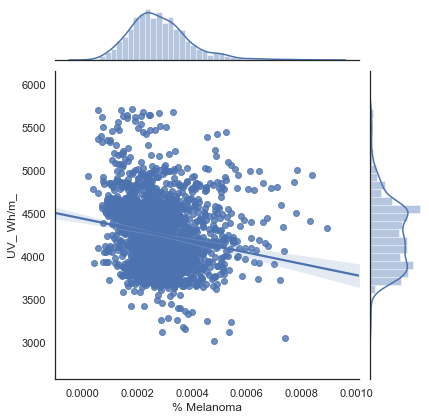

In [353]:
import numpy as np, pandas as pd
import seaborn as sns; sns.set(style="white", color_codes=True)
g = sns.jointplot(x= "% Melanoma", y="UV_ Wh/m_", data=merged, kind = 'reg')


In [365]:
#merger = np.array(merged['% Melanoma'])
#type(merged['COUNTY_FIPS'].tolist())
# merged['% Melanoma'].max()
# merged['% Melanoma'].hist(bins = 100)

SyntaxError: unexpected EOF while parsing (<ipython-input-365-7280517b342b>, line 4)

In [364]:
import plotly.figure_factory as ff

import numpy as np
import pandas as pd

colorscale = [
    'rgb(193, 193, 193)',
    'rgb(239,239,239)',
    'rgb(195, 196, 222)',
    'rgb(144,148,194)',
    'rgb(101,104,168)',
    'rgb(65, 53, 132)'
]


endpts = [(merged['% Melanoma']*100000).min(), ((merged['% Melanoma']*100000).max())*.25, (merged['% Melanoma']*100000).mean(), ((merged['% Melanoma']*100000).max())*.75, ((merged['% Melanoma']*100000).max())]
fips = merged['COUNTY_FIPS'].tolist()
values = (merged['% Melanoma']*100000).tolist()

fig = ff.create_choropleth(
    fips=fips, values=values,
    binning_endpoints=endpts,
    colorscale = colorscale,
    show_state_data=False,
    show_hover=True, centroid_marker=None,
    asp=2.9, 
    title='USA by % Melanoma',
    legend_title='% Melanoma',
    round_legend_values=True
)

fig.layout.template = None
fig.show()